In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [2]:
data = np.load('D:/ML_basics_Python/____Machinelearning___/datasets/knn/data.npy')
label = np.load('D:/ML_basics_Python/____Machinelearning___/datasets/knn/labels.npy')

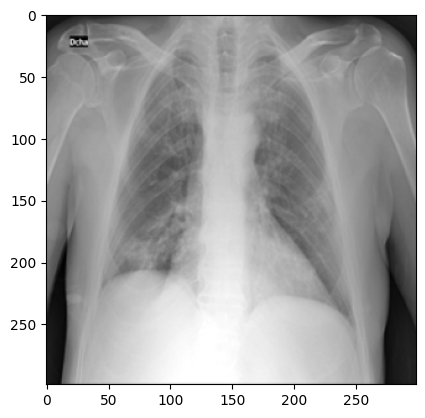

In [57]:
plt.imshow(data[2], cmap='gray')
plt.show()

In [3]:
'''data[i].shape
D=np.concatenate(data[i])
N=np.vectorize(D).all()'''
#df['data'] = df['data'].apply(lambda x: np.array(x).flatten())

'data[i].shape\nD=np.concatenate(data[i])\nN=np.vectorize(D).all()'

In [4]:
for i in range(len(label)):
    if label[i] == 'Infected':
        label[i] = int(1)
    elif label[i] == 'Normal':
        label[i] = int(0)


In [5]:
# Create a list of dictionaries to hold data and labels
data_list = []
for i in range(len(data)):
    data_list.append({'image': data[i], 'label': label[i]})

# Create DataFrame
df = pd.DataFrame(data_list)

# Display DataFrame
print(df)

                                                image label
0   [[135.0, 133.0, 131.0, 129.0, 129.0, 129.0, 12...     1
1   [[185.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...     1
2   [[24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 22.0, 22...     1
3   [[76.0, 77.0, 76.0, 76.0, 77.0, 76.0, 77.0, 77...     1
4   [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...     1
..                                                ...   ...
95  [[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...     0
96  [[17.0, 11.0, 7.0, 5.0, 4.0, 4.0, 4.0, 3.0, 3....     0
97  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...     0
98  [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...     0
99  [[25.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...     0

[100 rows x 2 columns]


In [13]:
df['image'] = df['image'].apply(lambda x: np.array(x).flatten())

In [14]:
df

,image,label
0,"[135.0, 133.0, 131.0, 129.0, 129.0, 129.0, 129...",1
1,"[185.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",1
2,"[24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 22.0, 22....",1
3,"[76.0, 77.0, 76.0, 76.0, 77.0, 76.0, 77.0, 77....",1
4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
...,...,...
95,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",0
96,"[17.0, 11.0, 7.0, 5.0, 4.0, 4.0, 4.0, 3.0, 3.0...",0
97,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
98,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [15]:
from sklearn.utils import shuffle
shuffled_DF= shuffle(df)
shuffled_DF

,image,label
33,"[16.0, 26.0, 31.0, 33.0, 35.0, 38.0, 39.0, 40....",1
45,"[238.0, 195.0, 186.0, 189.0, 189.0, 189.0, 190...",1
8,"[235.0, 228.0, 226.0, 226.0, 226.0, 227.0, 227...",1
20,"[12.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0,...",1
32,"[185.0, 162.0, 156.0, 156.0, 153.0, 147.0, 141...",1
...,...,...
84,"[234.0, 231.0, 227.0, 224.0, 221.0, 219.0, 217...",0
72,"[64.0, 50.0, 34.0, 25.0, 20.0, 16.0, 15.0, 14....",0
47,"[144.0, 145.0, 145.0, 144.0, 142.0, 142.0, 141...",1
9,"[39.0, 47.0, 43.0, 38.0, 34.0, 26.0, 13.0, 9.0...",1


In [16]:
rearranged_DF=shuffled_DF.reset_index(drop=True)
rearranged_DF

,image,label
0,"[16.0, 26.0, 31.0, 33.0, 35.0, 38.0, 39.0, 40....",1
1,"[238.0, 195.0, 186.0, 189.0, 189.0, 189.0, 190...",1
2,"[235.0, 228.0, 226.0, 226.0, 226.0, 227.0, 227...",1
3,"[12.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0,...",1
4,"[185.0, 162.0, 156.0, 156.0, 153.0, 147.0, 141...",1
...,...,...
95,"[234.0, 231.0, 227.0, 224.0, 221.0, 219.0, 217...",0
96,"[64.0, 50.0, 34.0, 25.0, 20.0, 16.0, 15.0, 14....",0
97,"[144.0, 145.0, 145.0, 144.0, 142.0, 142.0, 141...",1
98,"[39.0, 47.0, 43.0, 38.0, 34.0, 26.0, 13.0, 9.0...",1


In [17]:
#X= rearranged_DF.drop(columns=['label'])
#Y= rearranged_DF['label']
X = np.stack(rearranged_DF['image'].to_numpy())
Y = np.array(rearranged_DF['label'])

In [10]:
X

array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [162., 162., 167., ...,   0.,   0.,   0.],
        [171., 172., 177., ...,   1.,   0.,   0.],
        [179., 180., 185., ...,   3.,   0.,   0.]],

       [[ 64.,  50.,  34., ...,  25.,  23.,  15.],
        [ 65.,  49.,  34., ...,  28.,  26.,  18.],
        [ 55.,  41.,  28., ...,  27.,  26.,  17.],
        ...,
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.]],

       [[ 10.,   9.,   9., ...,  10.,   9.,   5.],
        [ 10.,   9.,   9., ...,  10.,   9.,   5.],
        [ 10.,   9.,   9., ...,   8.,   8.,   5.],
        ...,
        [198., 196., 194., ...,  45.,  61.,  66.],
        [212., 210., 210., ...,  72.,  87.,  91.],
        [217., 215., 214., ..., 108., 121., 122.]],

       ...,

       [[113., 109., 101

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 30
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [25]:
y_pred =KNN.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


Text(0, 0.5, 'Error rate')

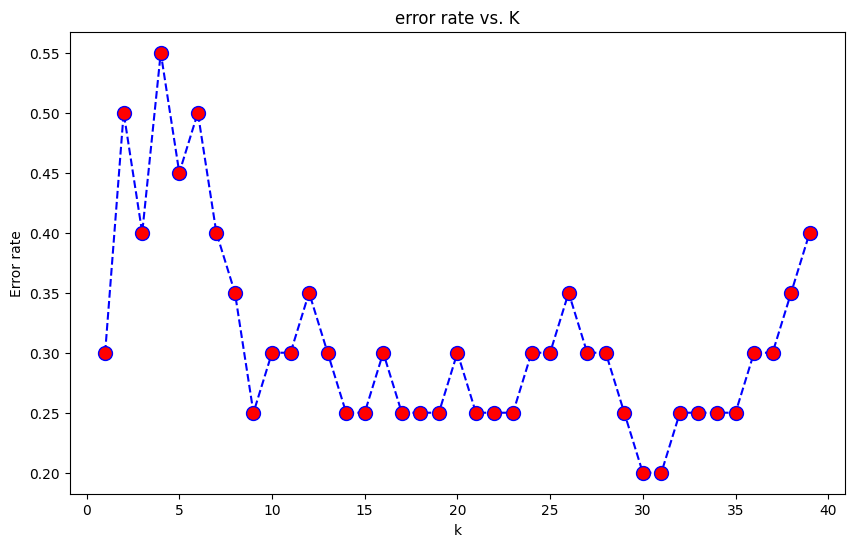

In [23]:
error_rate=[]
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    err_rate = np.mean(y_pred !=y_test)
    error_rate.append(err_rate)

plt.figure(figsize=(10,6))
plt.plot(
    range(1,40),
    error_rate,
    color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)

plt.title('error rate vs. K')
plt.xlabel('k')
plt.ylabel('Error rate')